In [1]:
#import library
import os
import numpy as np
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from tqdm import tqdm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
#load the pickle file
with open('../data/external/combined_augmented_data.pkl','rb') as f:
    X_aug_train,y_aug_train, X_aug_test, y_aug_test = pickle.load(f)

Applying naive bayes


In [3]:
gnb = GaussianNB()

In [4]:
#reshape to 784
X_aug_train =X_aug_train.reshape(X_aug_train.shape[0], -1)
X_aug_test =X_aug_test.reshape(X_aug_test.shape[0], -1)


# Define the class names
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

In [5]:
# applying NB 
y_pred_sc = gnb.fit(X_aug_train, y_aug_train).predict(X_aug_test)
y_pred_train = gnb.predict(X_aug_train)


print(f"Accuracy Test: {accuracy_score(y_aug_test, y_pred_sc)}")
print(f"Accuracy Train: {accuracy_score(y_aug_train, y_pred_train)}")

print("Classification report:")
print(classification_report(y_aug_test, y_pred_sc, target_names=letters))

Accuracy Test: 0.2414249860568879
Accuracy Train: 0.27559643052267346
Classification report:
              precision    recall  f1-score   support

           A       0.57      0.24      0.34       662
           B       0.80      0.21      0.33       864
           C       0.64      0.40      0.49       620
           D       0.43      0.18      0.25       490
           E       0.42      0.34      0.38       996
           F       0.38      0.18      0.24       494
           G       0.45      0.32      0.38       696
           H       0.77      0.21      0.33       872
           I       0.09      0.34      0.15       576
           K       0.25      0.30      0.27       662
           L       0.30      0.25      0.27       418
           M       0.30      0.12      0.17       788
           N       0.32      0.08      0.13       582
           O       0.37      0.29      0.33       492
           P       0.17      0.71      0.27       694
           Q       0.21      0.34      0.2

In [6]:
lr = LogisticRegression()

In [7]:
# testing logistic regression on test data
y_pred_lr_sc = lr.fit(X_aug_train, y_aug_train).predict(X_aug_test)

print(f"Accuracy Test: {accuracy_score(y_aug_test, y_pred_lr_sc)}")
print(f"Accuracy Train: {accuracy_score(y_aug_train, y_pred_train)}")

print("Classification report:")
print(classification_report(y_aug_test, y_pred_lr_sc, target_names=letters))

Accuracy Test: 0.53074456218628
Accuracy Train: 0.27559643052267346
Classification report:
              precision    recall  f1-score   support

           A       0.65      0.70      0.67       662
           B       0.77      0.64      0.70       864
           C       0.75      0.76      0.75       620
           D       0.54      0.57      0.56       490
           E       0.72      0.62      0.67       996
           F       0.57      0.64      0.60       494
           G       0.57      0.47      0.52       696
           H       0.78      0.58      0.66       872
           I       0.43      0.46      0.45       576
           K       0.53      0.52      0.53       662
           L       0.53      0.77      0.62       418
           M       0.49      0.43      0.46       788
           N       0.42      0.37      0.39       582
           O       0.66      0.54      0.60       492
           P       0.81      0.79      0.80       694
           Q       0.46      0.69      0.55 

C:\Users\15513\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
X_train,y_train, X_test, y_test =X_aug_train,y_aug_train, X_aug_test, y_aug_test

In [9]:
#define sklearn LDA object 
lda = LinearDiscriminantAnalysis()
#fit on training data 
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

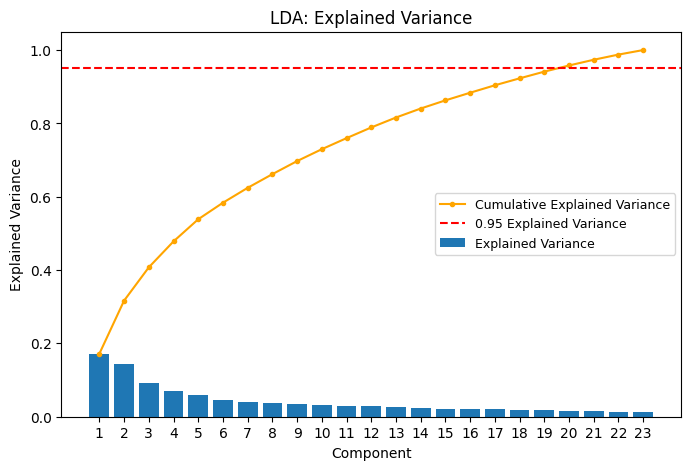

In [10]:
#getting explained variance ratio from the lda model 
evr = lda.explained_variance_ratio_
components = range(1, len(evr) + 1)

#plotting scree plot
fig, ax = plt.subplots(figsize = (8,5))
ax.bar(x = components, height = evr, label = 'Explained Variance');
plt.plot(components, np.cumsum(evr), marker = '.', color = 'orange', label = 'Cumulative Explained Variance')
plt.axhline(y = .95, color = 'r', linestyle = '--', label = '0.95 Explained Variance')
plt.xticks(range(1, len(evr)+1));
plt.title('LDA: Explained Variance');
plt.xlabel('Component');
plt.ylabel('Explained Variance');
plt.legend(fontsize = 9);

In [11]:
#fit on training data and transform
X_train_lda = lda.fit_transform(X_train,y_train)
X_test_lda = lda.transform(X_test)

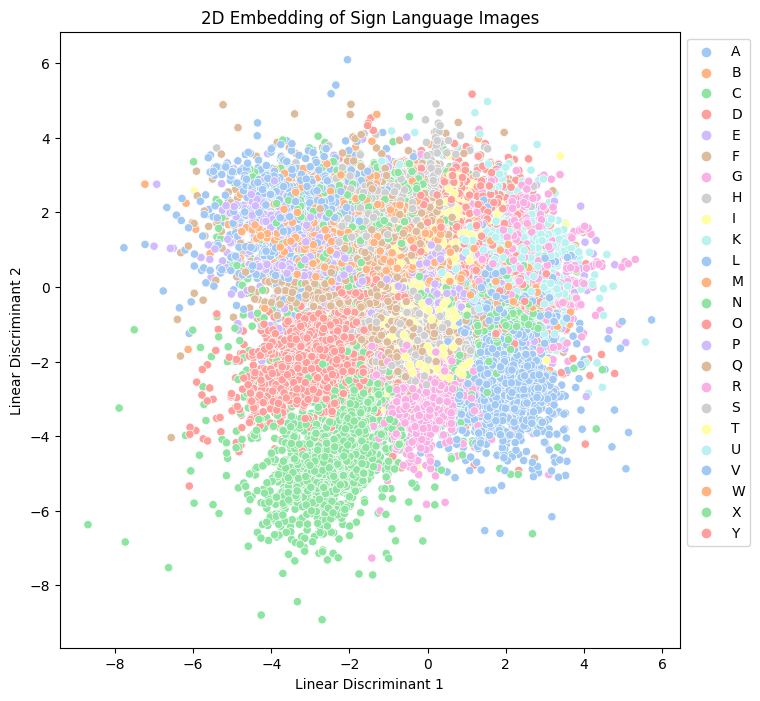

In [12]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (8,8))
ax = sns.scatterplot(x = X_train_lda[:,0], y = X_train_lda[:,1], hue = y_train, palette = 'pastel');
handler, _ = ax.get_legend_handles_labels();
plt.legend(handler, letters, bbox_to_anchor = (1, 1));
plt.title('2D Embedding of Sign Language Images')
plt.xlabel('Linear Discriminant 1');
plt.ylabel('Linear Discriminant 2');

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
#SVM

#defining support vector machine parameters
parameters = {'kernel':['rbf'],'gamma':['auto'],'C':np.linspace(2.62,2.7,10)}

# defining randomized grid search cv 
clf = RandomizedSearchCV(SVC(), param_distributions=parameters, random_state=99, verbose=3)
#fitting to LDA transformed training data 
search_lda = clf.fit(X_train_lda, y_aug_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....C=2.62, gamma=auto, kernel=rbf;, score=0.455 total time= 1.1min
[CV 2/5] END ....C=2.62, gamma=auto, kernel=rbf;, score=0.450 total time= 1.0min
[CV 3/5] END ....C=2.62, gamma=auto, kernel=rbf;, score=0.735 total time= 1.1min
[CV 4/5] END ....C=2.62, gamma=auto, kernel=rbf;, score=0.999 total time= 1.3min
[CV 5/5] END ....C=2.62, gamma=auto, kernel=rbf;, score=0.999 total time= 1.3min
[CV 1/5] END C=2.628888888888889, gamma=auto, kernel=rbf;, score=0.455 total time=  51.0s
[CV 2/5] END C=2.628888888888889, gamma=auto, kernel=rbf;, score=0.450 total time=  51.4s
[CV 3/5] END C=2.628888888888889, gamma=auto, kernel=rbf;, score=0.735 total time= 1.1min
[CV 4/5] END C=2.628888888888889, gamma=auto, kernel=rbf;, score=0.999 total time= 1.4min
[CV 5/5] END C=2.628888888888889, gamma=auto, kernel=rbf;, score=0.999 total time= 1.5min
[CV 1/5] END C=2.637777777777778, gamma=auto, kernel=rbf;, score=0.455 total time=  